In [1]:
import os

os.chdir('C:/대학원/2019-1/1.전공/2.데이터마이닝/project/도로/result')
os.getcwd()

'C:\\대학원\\2019-1\\1.전공\\2.데이터마이닝\\project\\도로\\result'

In [2]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
pd.set_option('display.max_columns', 500)
train.head(2)

,date,days,road_name,link_id,start_point,end_point,direction,road_length,road_num,road_type,urban_suburb,district,holiday,special,vacation,time,inter_num,d1,d2,d3,d4,victims,severity,accident_count,temperature,wind,rain,snow,cctv,kids,speed_limit,entrance,signal,SO2,CO,O3,NO2,PM10,PM2.5,month,weekend,y
0,20181112,월,언주로,1220024700,개나리아파트,르네상스호텔,하행,484,4.0,주간선도로,외곽,강남구,0,0,0,22,14.0,1,63,307,34,405,1156,246,10.5,1.1,0.0,0.0,1.0,0.0,60.0,76.0,68.0,0.007,0.6,0.002,0.055,36.0,20.0,11,0,28.16
1,20180721,토,양재대로,1220000200,구룡사앞,구룡터널,상행,851,4.0,주간선도로,외곽,강남구,0,0,0,21,28.0,3,132,434,52,621,1786,419,31.8,1.9,0.0,0.0,0.0,0.0,50.0,64.0,115.0,0.006,0.3,0.020,0.027,29.0,21.0,7,1,36.57


In [3]:
cluster = pd.read_csv("cluster_df.csv")

In [4]:
train = pd.merge(train, cluster, how = 'left', left_on = ['link_id'], right_on = ['link_id'])
train.head()

,date,days,road_name,link_id,start_point,end_point,direction,road_length,road_num,road_type,...,SO2,CO,O3,NO2,PM10,PM2.5,month,weekend,y,cluster
0,20181112,월,언주로,1220024700,개나리아파트,르네상스호텔,하행,484,4.0,주간선도로,...,0.007,0.6,0.002,0.055,36.0,20.0,11,0,28.16,2
1,20180721,토,양재대로,1220000200,구룡사앞,구룡터널,상행,851,4.0,주간선도로,...,0.006,0.3,0.020,0.027,29.0,21.0,7,1,36.57,0
2,20180917,월,영동대로,1220003400,삼성역,코엑스,하행,652,7.0,주간선도로,...,0.005,0.5,0.019,0.037,23.0,11.0,9,0,26.26,0
3,20180630,토,봉은사로,1220031700,봉은교,종합운동장후문,하행,291,2.0,주간선도로,...,0.005,0.5,0.030,0.026,50.0,38.0,6,1,18.26,2
4,20181116,금,남부순환로,1220018500,도곡역,대치역,상행,798,4.0,주간선도로,...,0.006,0.6,0.023,0.029,40.0,28.0,11,0,18.51,0


In [5]:
train = train[train['cluster'].isin(['1'])]

In [6]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
train["direction"] = lb_make.fit_transform(train["direction"])
train["road_type"] = lb_make.fit_transform(train["road_type"])
train["urban_suburb"] = lb_make.fit_transform(train["urban_suburb"])

In [7]:
train['signal_length'] = train['signal']/train['road_length']
train['entrance_length'] = train['entrance']/train['road_length']

In [11]:
train.head(2)

,date,days,road_name,link_id,start_point,end_point,direction,road_length,road_num,road_type,...,O3,NO2,PM10,PM2.5,month,weekend,y,cluster,signal_length,entrance_length
9,20180908,5,언주로,1210007800,구룡터널,내곡IC,0,2429,2.0,1,...,0.022,0.026,22.0,9.0,9,1,35.73,1,0.027995,0.031289
15,20180504,0,광평로,1220010100,일원역,수서역,0,1693,3.0,1,...,0.038,0.020,37.0,14.0,5,0,24.78,1,0.013585,0.007679


# Modeling

In [6]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

In [26]:
rf = RandomForestRegressor(n_jobs = -1)
xgb = XGBRegressor(n_jobs = -1)
lgb = LGBMRegressor(n_jobs = -1)

In [8]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
train["days"] = lb_make.fit_transform(train["days"])
train["direction"] = lb_make.fit_transform(train["direction"])
train["road_type"] = lb_make.fit_transform(train["road_type"])
train["urban_suburb"] = lb_make.fit_transform(train["urban_suburb"])
train["district"] = lb_make.fit_transform(train["district"])
train["time"] = lb_make.fit_transform(train["time"])

test["days"] = lb_make.fit_transform(test["days"])
test["direction"] = lb_make.fit_transform(test["direction"])
test["road_type"] = lb_make.fit_transform(test["road_type"])
test["urban_suburb"] = lb_make.fit_transform(test["urban_suburb"])
test["district"] = lb_make.fit_transform(test["district"])
test["time"] = lb_make.fit_transform(test["time"])

print(train.shape)


(49099, 45)


In [9]:
X_train = train[['temperature','time','PM10','NO2','O3','road_length','wind','PM2.5','speed_limit','days']]
X_test = test[['temperature','time','PM10','NO2','O3','road_length','wind','PM2.5','speed_limit','days']]
y_train = train['y']
y_test = test['y']

In [10]:
X_train.to_csv("X_train.csv",index=False)
X_test.to_csv("X_test.csv",index=False)
y_train.to_csv("y_train.csv",index=False)
y_test.to_csv("y_test.csv",index=False)

In [57]:
#dummy로 처리
X_train_dummy = pd.get_dummies(X_train, columns=['days','time','urban_suburb','road_type','direction'])
X_test_dummy = pd.get_dummies(X_test, columns=['days','time','urban_suburb','road_type','direction'])

KeyError: "['urban_suburb' 'road_type' 'direction'] not in index"

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score

def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    mse = mean_squared_error(y_test, pred)    
    r2 = r2_score(y_test, pred)   
    
    print('###',model.__class__.__name__,'###')
    print('MSE: {0:.3f}, R2: {1:.3F}'.format(mse, r2*100))

In [36]:
get_model_predict(rf, X_train, X_test, y_train, y_test)

ValueError: Number of features of the model must match the input. Model n_features is 39 and input n_features is 36 

# pdp

In [59]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

my_model = GradientBoostingRegressor()
my_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [61]:
X_train.head(1)

,temperature,time,PM10,NO2,O3,road_length,wind,PM2.5,speed_limit,days
9,23.8,11,22.0,0.026,0.022,2429,0.9,9.0,60.0,5


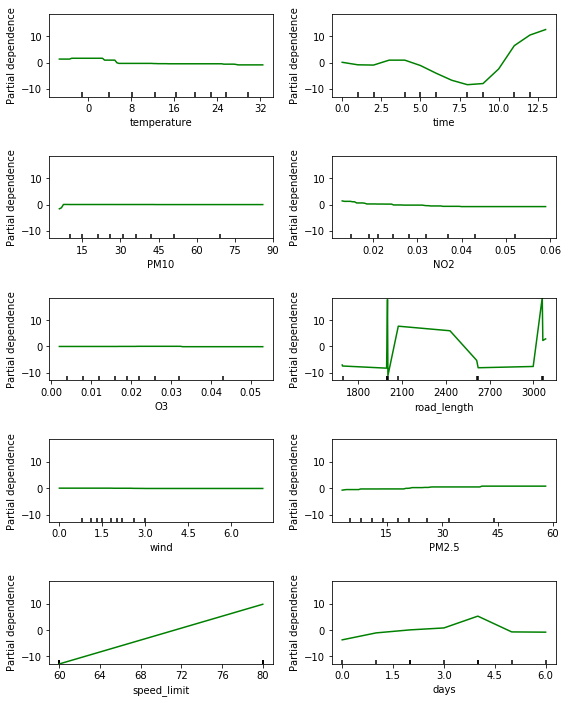

In [62]:
names = ['temperature','time','PM10','NO2','O3','road_length','wind','PM2.5','speed_limit','days']
#fig, axs = plot_partial_dependence(my_model, X_train, feature_names = names, n_cols = 2)


fig, axs = plot_partial_dependence(my_model, X_train, features = list(range(10)), n_cols = 2,
                                  feature_names=names)

fig.set_figwidth(8)
fig.set_figheight(10)
fig.tight_layout()

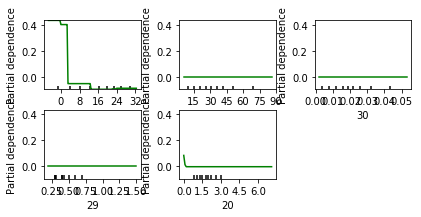

In [40]:
my_plots = plot_partial_dependence(my_model,       
                                   features=[19,32,30,29,20], # 'temperature','PM10','NO2', 'O3','wind'
                                   X=X_train)

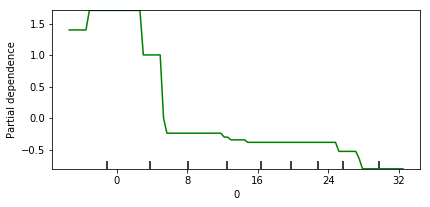

In [66]:
fig, axs = plot_partial_dependence(my_model, X_train, features = [0])